# Installing dependencies

In [ ]:
! pip install livelossplot

In [ ]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
#Code to keep colab running
#function ConnectButton(){
#    console.log("Connect pushed"); 
#    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
#}
#setInterval(ConnectButton,60000);

# Preparation

## Prepare Covid-Net dataset

In [ ]:
!unzip -qq drive/My\ Drive/data.zip
!unzip -qq drive/My\ Drive/data_balanced.zip

## Importing data unbalanced

In [ ]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np

np.random.seed(7)

train_data = pd.read_csv('drive/My Drive/train_split_v3.txt', header=None, sep=' ', names=['id','image', 'result', 'type1', 'type2'])
print(train_data.head())


test_data = pd.read_csv('drive/My Drive/test_split_v3.txt', header=None, sep=' ', names=['id','image', 'result', 'type1', 'type2'])
test_data.head(1)

image_height = 224 #150
image_width = 224 #150

  id                                              image     result type1 type2
0  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....  pneumonia    PA   NaN
1  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....  pneumonia    PA   NaN
2  3  SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...  pneumonia    PA   NaN
3  7  SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...  pneumonia    PA   NaN
4  7  SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...  pneumonia    PA   NaN


In [ ]:
print(train_data['result'].unique())
train_data[train_data['result'] == 'COVID-19'].count()

['pneumonia' 'COVID-19' 'normal']


id        223
image     223
result    223
type1     196
type2      27
dtype: int64

In [ ]:
print(test_data['result'].unique())
test_data[test_data['result'] == 'COVID-19'].count()

['pneumonia' 'COVID-19' 'normal']


id        31
image     31
result    31
type1     31
type2      8
dtype: int64

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32 #10

train_generator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2
)

test_generator = ImageDataGenerator(
    rescale=1/255
)

train_set = train_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='image',
    directory="data/train/",
    y_col='result',
    shuffle=True,
    target_size=(image_width, image_height),
    batch_size = batch_size,
    class_mode='categorical'
)

test_set = test_generator.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="data/test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = batch_size,
    class_mode='categorical'
)

Found 13640 validated image filenames belonging to 3 classes.
Found 1510 validated image filenames belonging to 3 classes.


### Analysing Data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)


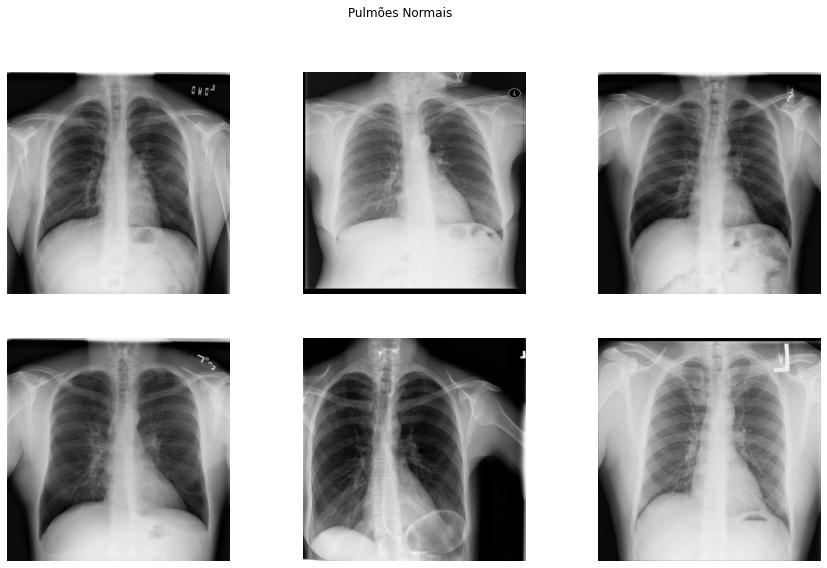

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import cv2

f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data[train_data['result'] == 'normal']['image']

for i in range(0,6):
  im = cv2.imread('data/train/' + samples_normal.iloc[i])
  print(im.shape)
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões Normais')
plt.show()

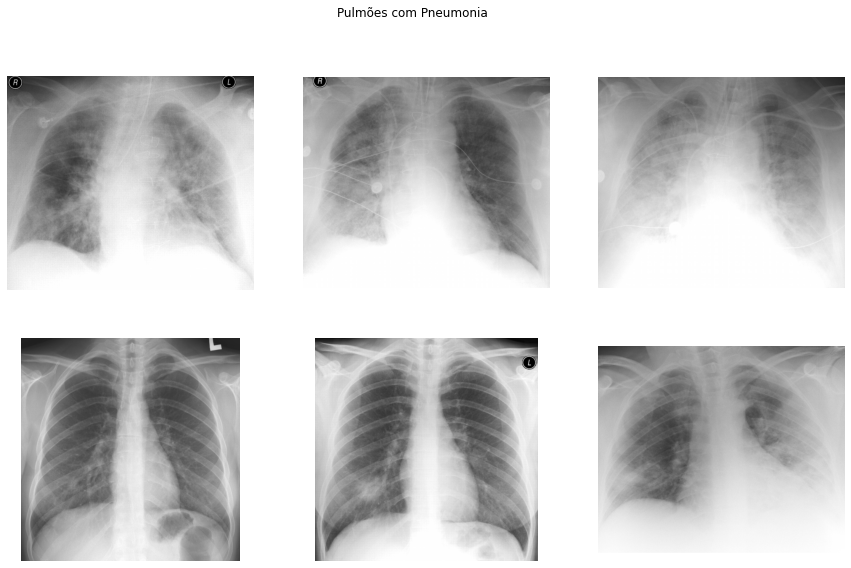

In [ ]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data[train_data['result'] == 'pneumonia']['image']

for i in range(0,6):
  im = cv2.imread('data/train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com Pneumonia')
plt.show()

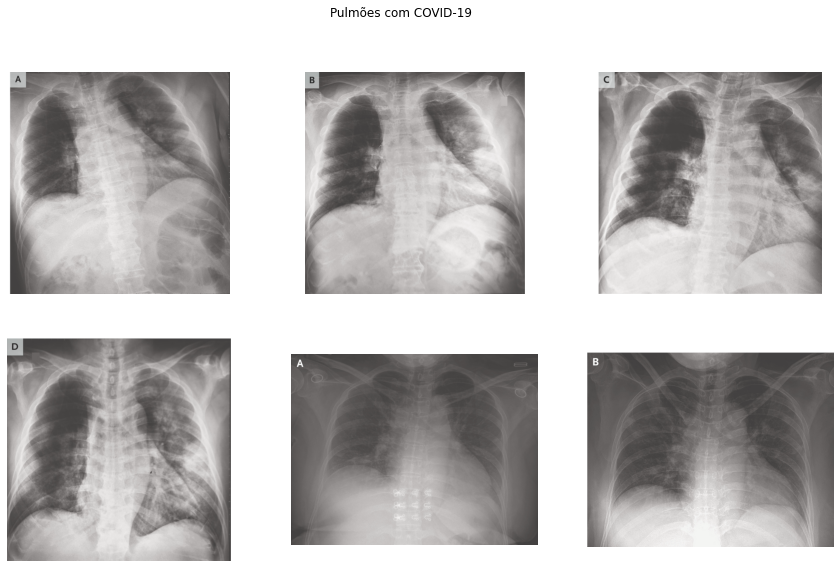

In [ ]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data[train_data['result'] == 'COVID-19']['image']

for i in range(0,6):
  im = cv2.imread('data/train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com COVID-19')
plt.show()

<Figure size 432x288 with 0 Axes>

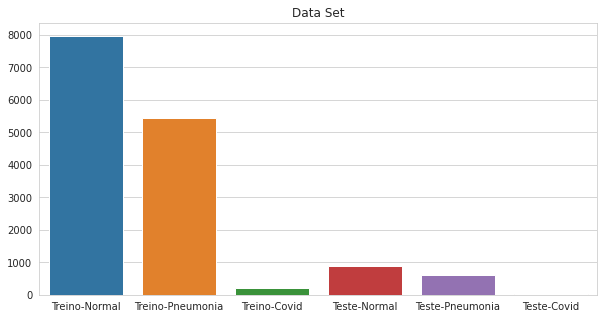

In [ ]:
sns.set_style('whitegrid')
plt.figure()
plt.subplots(figsize=(10,5))
grafico=sns.barplot(x=['Treino-Normal','Treino-Pneumonia','Treino-Covid','Teste-Normal','Teste-Pneumonia','Teste-Covid'],
                    y=[train_data[train_data['result'] == 'normal'].shape[0],
                       train_data[train_data['result'] == 'pneumonia'].shape[0],
                       train_data[train_data['result'] == 'COVID-19'].shape[0],
                       test_data[test_data['result'] == 'normal'].shape[0],
                       test_data[test_data['result'] == 'pneumonia'].shape[0],
                       test_data[test_data['result'] == 'COVID-19'].shape[0]
                    ]) 
grafico.set_title('Data Set')
plt.show()

## Importing data balanced

In [ ]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np

np.random.seed(7)

train_data_balanced = pd.read_csv('drive/My Drive/train_split_v3_augmented.csv', sep=',', index_col=0)
print(train_data_balanced.head())


test_data_balanced = pd.read_csv('drive/My Drive/test_split_v3.txt', header=None, sep=' ', names=['id','image', 'result', 'type1', 'type2'])
test_data_balanced.head(1)

image_height = 224 #150
image_width = 224 #150

                                     id  ... type2
0  21e403ae-139b-4419-b3fa-0bf13d97d245  ...   NaN
1  5458205b-c67a-44de-a1e3-009f977b4f98  ...   NaN
2  4769fa12-e694-48ce-ad4e-0628e5dd75f0  ...   NaN
3  c8b05677-ce24-4967-a152-3602c5332c4c  ...   NaN
4  d8fe9c83-74df-4ca8-8075-012b6f1076bc  ...   NaN

[5 rows x 5 columns]


In [ ]:
print(train_data_balanced['result'].unique())
train_data_balanced[train_data_balanced['result'] == 'COVID-19'].count()

['normal' 'pneumonia' 'COVID-19']


id         223
image     1561
result    1561
type1      196
type2       27
dtype: int64

In [ ]:
print(test_data_balanced['result'].unique())
test_data_balanced[test_data_balanced['result'] == 'COVID-19'].count()

['pneumonia' 'COVID-19' 'normal']


id        31
image     31
result    31
type1     31
type2      8
dtype: int64

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32 #10

train_generator_balanced = ImageDataGenerator(
    rescale=1/255
)

test_generator_balanced = ImageDataGenerator(
    rescale=1/255
)

train_set_balanced = train_generator_balanced.flow_from_dataframe(
    dataframe=train_data_balanced,
    x_col='image',
    directory="train/",
    y_col='result',
    shuffle=True,
    target_size=(image_width, image_height),
    batch_size = batch_size,
    class_mode='categorical'
)

test_set_balanced = test_generator_balanced.flow_from_dataframe(
    dataframe=test_data_balanced,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = batch_size,
    class_mode='categorical'
)

Found 4961 validated image filenames belonging to 3 classes.
Found 1510 validated image filenames belonging to 3 classes.


### Analysing Data

(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)


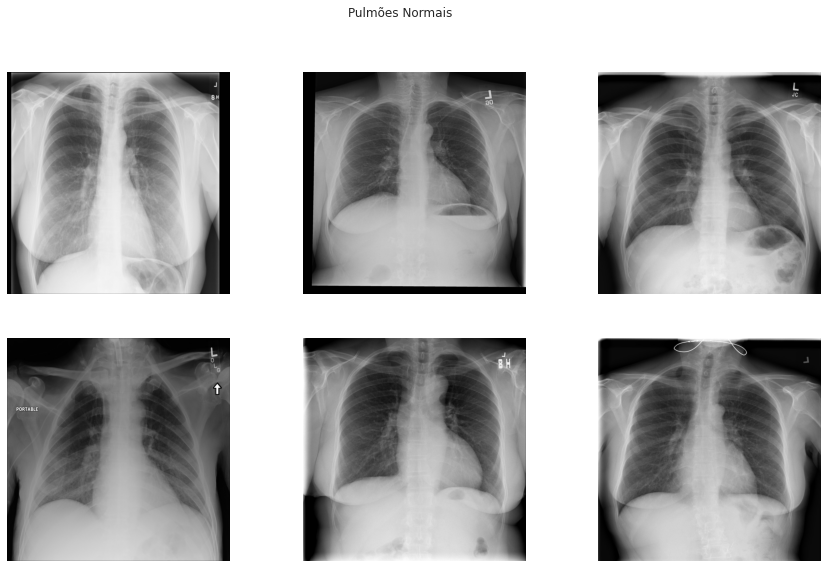

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import cv2

f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data_balanced[train_data_balanced['result'] == 'normal']['image']

for i in range(0,6):
  im = cv2.imread('train/' + samples_normal.iloc[i])
  print(im.shape)
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões Normais')
plt.show()

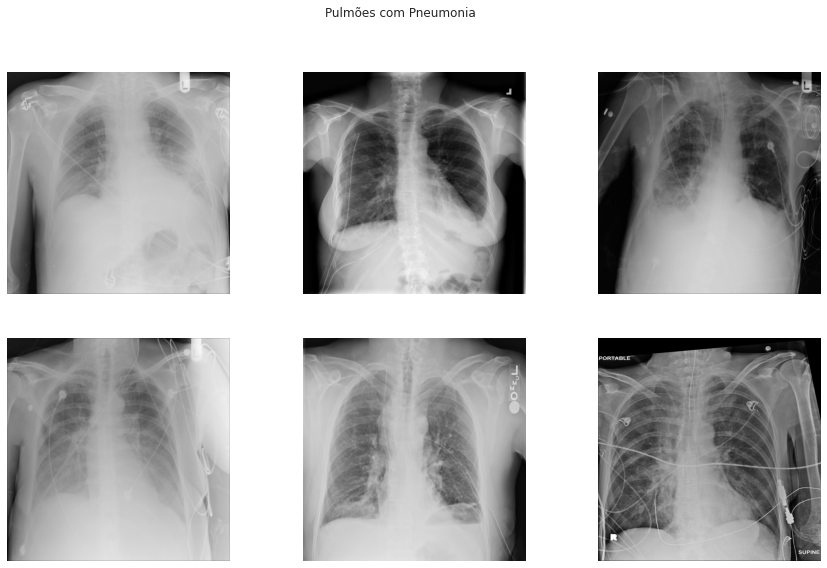

In [ ]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data_balanced[train_data_balanced['result'] == 'pneumonia']['image']

for i in range(0,6):
  im = cv2.imread('train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com Pneumonia')
plt.show()

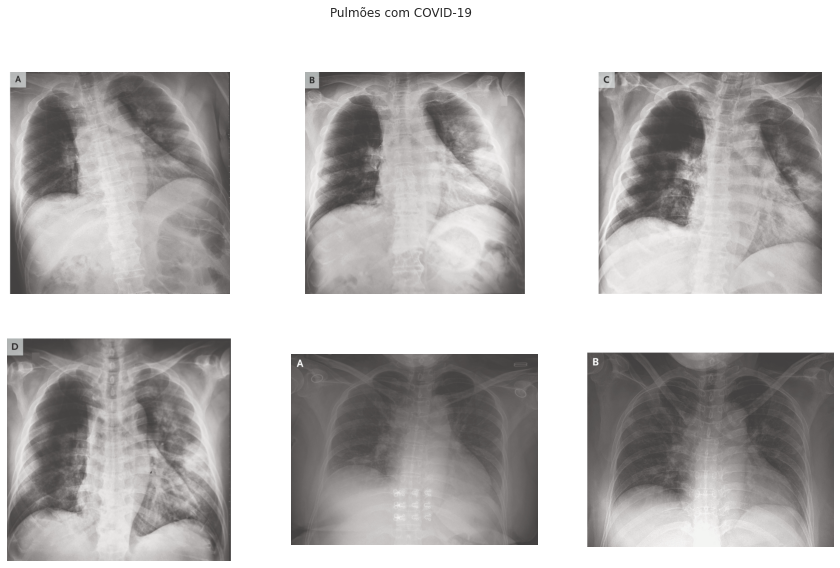

In [ ]:
f,ax = plt.subplots(2,3,figsize=(15,9))
samples_normal = train_data_balanced[train_data_balanced['result'] == 'COVID-19']['image']

for i in range(0,6):
  im = cv2.imread('train/' + samples_normal.iloc[i])
  ax[i//3,i%3].imshow(im)
  ax[i//3,i%3].axis('off')
f.suptitle('Pulmões com COVID-19')
plt.show()

<Figure size 432x288 with 0 Axes>

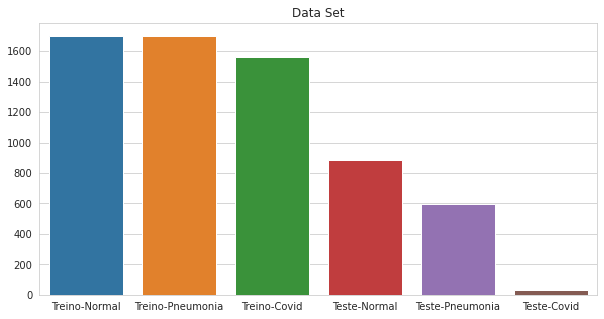

In [ ]:
sns.set_style('whitegrid')
plt.figure()
plt.subplots(figsize=(10,5))
grafico=sns.barplot(x=['Treino-Normal','Treino-Pneumonia','Treino-Covid','Teste-Normal','Teste-Pneumonia','Teste-Covid'],
                    y=[train_data_balanced[train_data_balanced['result'] == 'normal'].shape[0],
                       train_data_balanced[train_data_balanced['result'] == 'pneumonia'].shape[0],
                       train_data_balanced[train_data_balanced['result'] == 'COVID-19'].shape[0],
                       test_data_balanced[test_data_balanced['result'] == 'normal'].shape[0],
                       test_data_balanced[test_data_balanced['result'] == 'pneumonia'].shape[0],
                       test_data_balanced[test_data_balanced['result'] == 'COVID-19'].shape[0]
                    ]) 
grafico.set_title('Data Set')
plt.show()

# Developing model

## Auxiliary Functions

In [ ]:
import os

def save_model_on_cloud(model,name,ind):
  path="/content/drive/My Drive/covid_runs/run"+ind
  os.makedirs(path)
  model.save_weights(path + "/last_run" + name + ".hdf5")
  json_model = model.to_json()
  with open(path + "/" + name + ".json", "w") as json_file:
    json_file.write(model_json)
  os.rename("best_weights_" + name + ".hdf5", path + "/best_weights_" + name + ".hdf5")

In [ ]:
from keras.models import model_from_json
import json

def load_model_from_cloud(model_path, weights_path):
  with open(model_path, 'r') as json_file:
    architecture  = json.load(json_file)
    model = model_from_json(json.dumps(architecture))
  model.load_weights(weights_path)
  return model

In [ ]:
import cv2
def query_model(model, img):
  tmp_image = cv2.imread(img)
  tmp_image = np.array(tmp_image)
  tmp_image = cv2.resize(tmp_image, (image_width, image_height))
  tmp_image = tmp_image / 255
  res = model.predict(np.expand_dims(tmp_image, axis=0))
  print(test_set.class_indices)
  ind = np.argmax(res)
  print(ind)
  print([t * 100 for t in res])

## Training CXRP-1B with Balanced DataSet

In [ ]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(3,activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 64)       

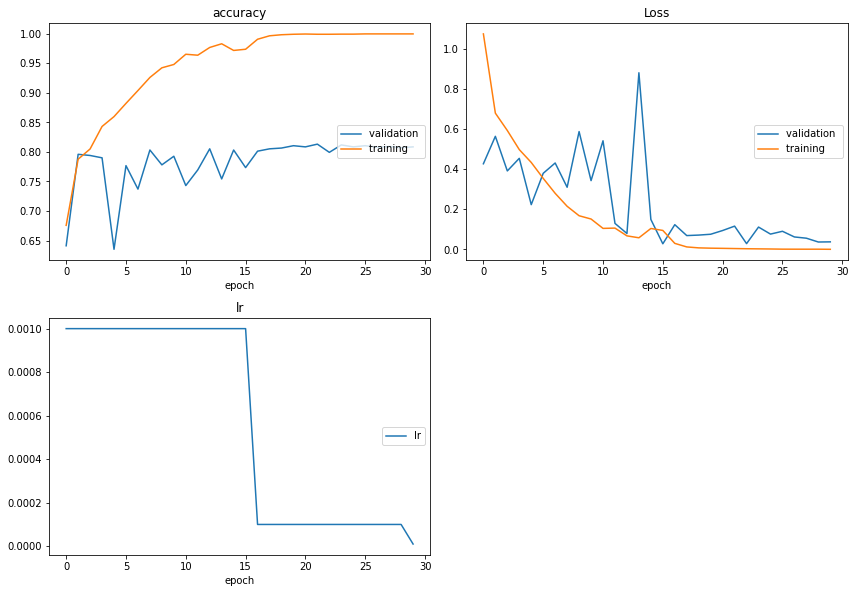

accuracy
	validation       	 (min:    0.635, max:    0.813, cur:    0.809)
	training         	 (min:    0.676, max:    1.000, cur:    1.000)
Loss
	validation       	 (min:    0.028, max:    0.881, cur:    0.038)
	training         	 (min:    0.001, max:    1.075, cur:    0.001)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)

Epoch 00030: val_loss did not improve from 0.02838


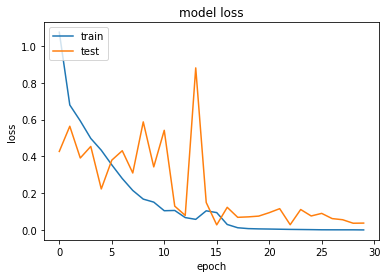

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 30 #10
path="/content/drive/My Drive/covid_runs/attempt2/"

os.makedirs(path, exist_ok=True)
json_model = model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]

history = model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks,
    class_weight={0:3,1:1,2:1}
)


model.save_weights(path + "last_run.hdf5")
model.save(path + "model_state")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [ ]:
model_cloud = load_model_from_cloud(path + "model.json", path + "last_run.hdf5")
model_cloud.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 64)       

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [ ]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [ ]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.34      0.61      0.44        31
      Normal       0.88      0.82      0.85       885
   Pneumonia       0.76      0.81      0.78       594

    accuracy                           0.81      1510
   macro avg       0.66      0.75      0.69      1510
weighted avg       0.82      0.81      0.81      1510



Text(0, 0.5, 'Ground truth')

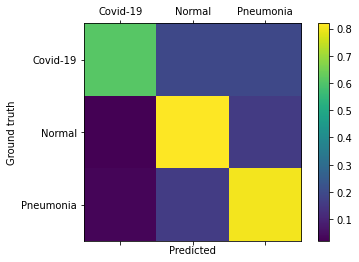

In [ ]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

## Training CXRP-2B with Balanced DataSet

In [ ]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(3,activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 64)       

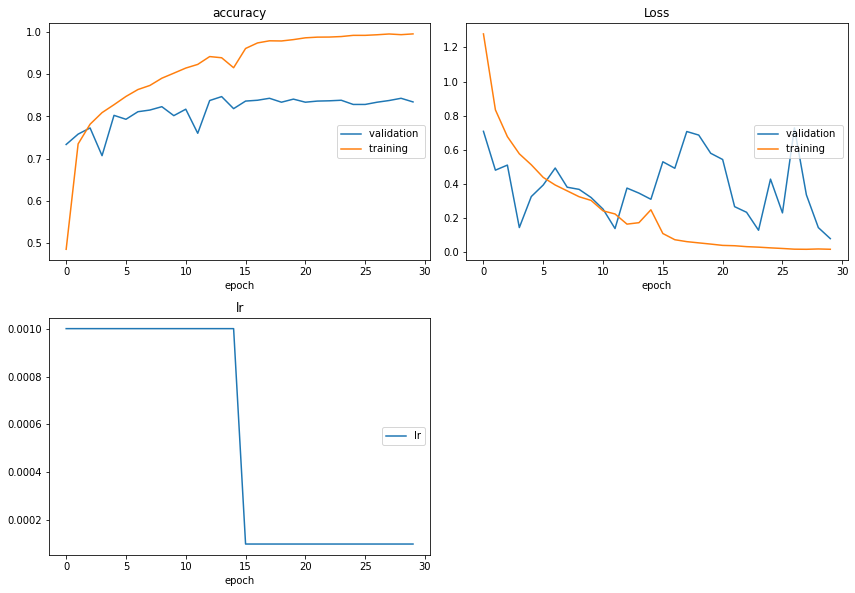

accuracy
	validation       	 (min:    0.707, max:    0.847, cur:    0.834)
	training         	 (min:    0.486, max:    0.995, cur:    0.995)
Loss
	validation       	 (min:    0.080, max:    0.728, cur:    0.080)
	training         	 (min:    0.018, max:    1.279, cur:    0.018)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)

Epoch 00030: val_loss improved from 0.12912 to 0.08004, saving model to /content/drive/My Drive/covid_runs/attempt3/best_weights.hdf5


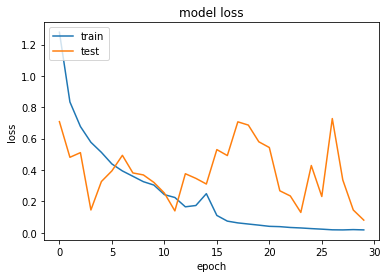

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 30 #10
path="/content/drive/My Drive/covid_runs/attempt3/"

os.makedirs(path, exist_ok=True)
json_model = model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]

history = model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks,
    class_weight={0:3,1:1,2:1}
)


model.save_weights(path + "last_run.hdf5")
model.save(path + "model_state")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [ ]:
model_cloud = load_model_from_cloud(path + "model.json", path + "last_run.hdf5")
model_cloud.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 64)       

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [ ]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [ ]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.39      0.71      0.51        31
      Normal       0.90      0.84      0.87       885
   Pneumonia       0.79      0.83      0.81       594

    accuracy                           0.83      1510
   macro avg       0.69      0.79      0.73      1510
weighted avg       0.84      0.83      0.84      1510



Text(0, 0.5, 'Ground truth')

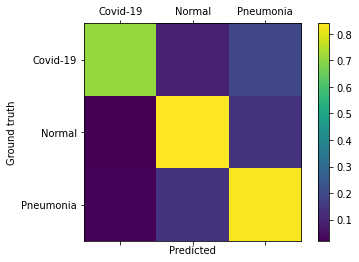

In [ ]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

## Training CXRP-3B with Balanced DataSet

In [ ]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(3,activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 56, 56, 64)       

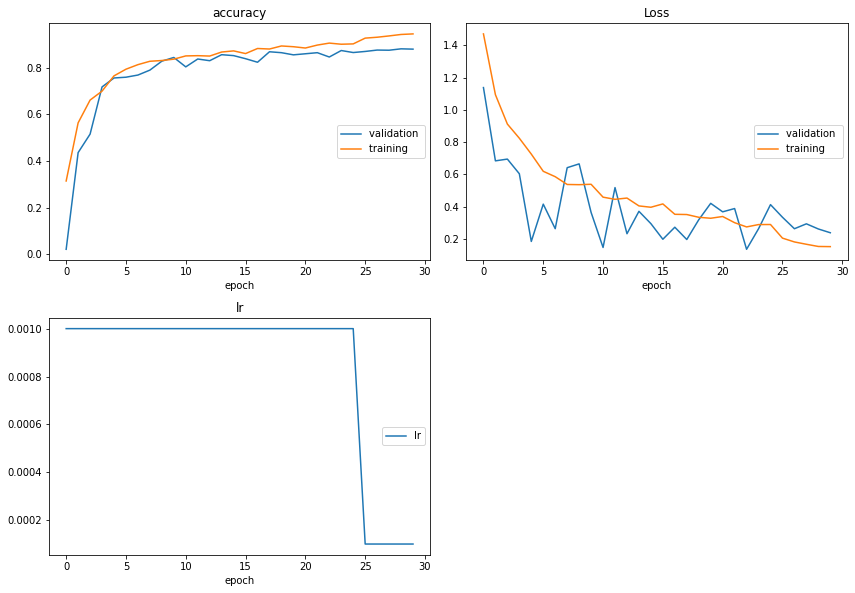

accuracy
	validation       	 (min:    0.021, max:    0.881, cur:    0.880)
	training         	 (min:    0.314, max:    0.946, cur:    0.946)
Loss
	validation       	 (min:    0.136, max:    1.138, cur:    0.238)
	training         	 (min:    0.153, max:    1.470, cur:    0.153)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)

Epoch 00030: val_loss did not improve from 0.13599


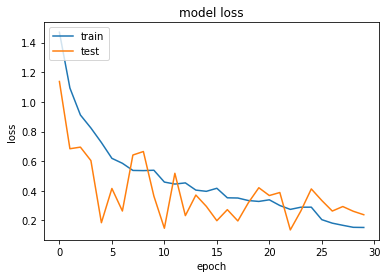

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 30 #10
path="/content/drive/My Drive/covid_runs/attempt4/"

os.makedirs(path, exist_ok=True)
json_model = model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]

history = model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks,
    class_weight={0:3,1:1,2:1}
)


model.save_weights(path + "last_run.hdf5")
model.save(path + "model_state")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [ ]:
model_cloud = load_model_from_cloud(path + "model.json", path + "last_run.hdf5")
model_cloud.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 56, 56, 64)       

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [ ]:
predict = model.predict_generator(predict_set,steps = nb_samples)

In [ ]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.42      0.90      0.57        31
      Normal       0.91      0.90      0.91       885
   Pneumonia       0.89      0.84      0.86       594

    accuracy                           0.88      1510
   macro avg       0.74      0.88      0.78      1510
weighted avg       0.89      0.88      0.88      1510



Text(0, 0.5, 'Ground truth')

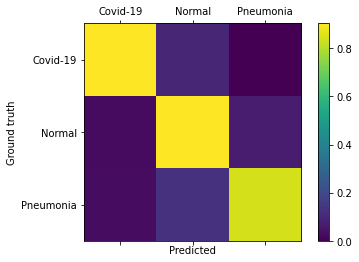

In [ ]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

## Training CXRP-3B_V2 with Balanced DataSet

In [ ]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(2,2),activation='relu', padding='same'))
model.add(Conv2D(64,(2,2),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(3,activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 56, 56, 64)      

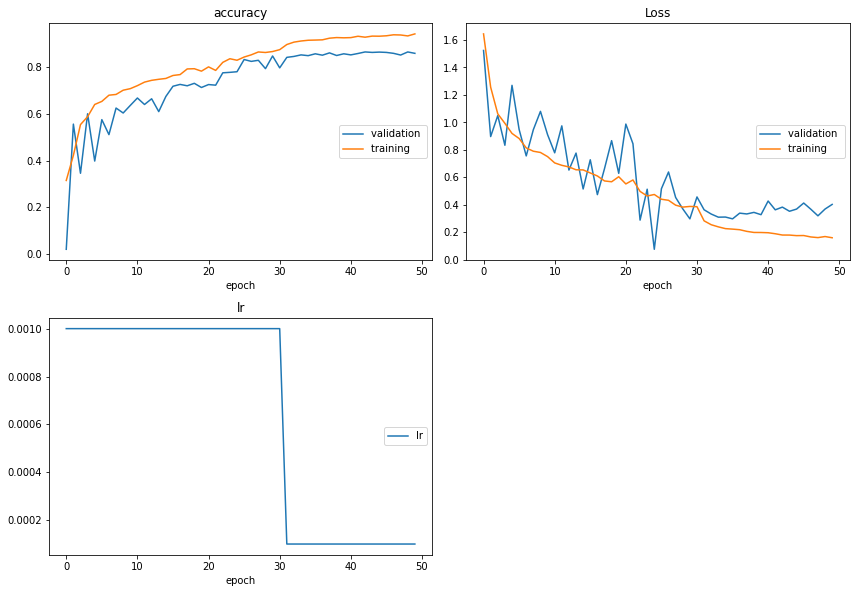

accuracy
	validation       	 (min:    0.021, max:    0.866, cur:    0.860)
	training         	 (min:    0.315, max:    0.944, cur:    0.944)
Loss
	validation       	 (min:    0.077, max:    1.524, cur:    0.403)
	training         	 (min:    0.161, max:    1.645, cur:    0.161)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)

Epoch 00050: val_loss did not improve from 0.07663


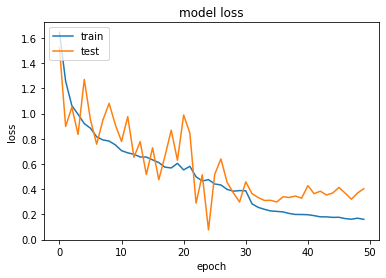

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 50 #10
path="/content/drive/My Drive/covid_runs/attempt5/"

os.makedirs(path, exist_ok=True)
json_model = model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]

history = model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks,
    class_weight={0:3,1:1,2:1}
)


model.save_weights(path + "last_run.hdf5")
model.save(path + "model_state")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [ ]:
model_cloud = load_model_from_cloud(path + "model.json", path + "last_run.hdf5")
model_cloud.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 56, 56, 64)      

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [ ]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [ ]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.38      0.71      0.49        31
      Normal       0.88      0.92      0.90       885
   Pneumonia       0.87      0.78      0.82       594

    accuracy                           0.86      1510
   macro avg       0.71      0.80      0.74      1510
weighted avg       0.87      0.86      0.86      1510



Text(0, 0.5, 'Ground truth')

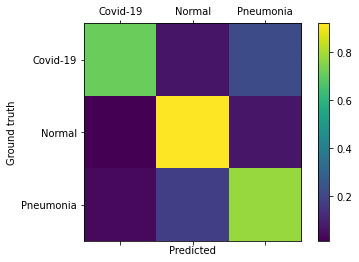

In [ ]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

## Training CXRP-3B_V3 with Balanced DataSet

In [ ]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(3,activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)       

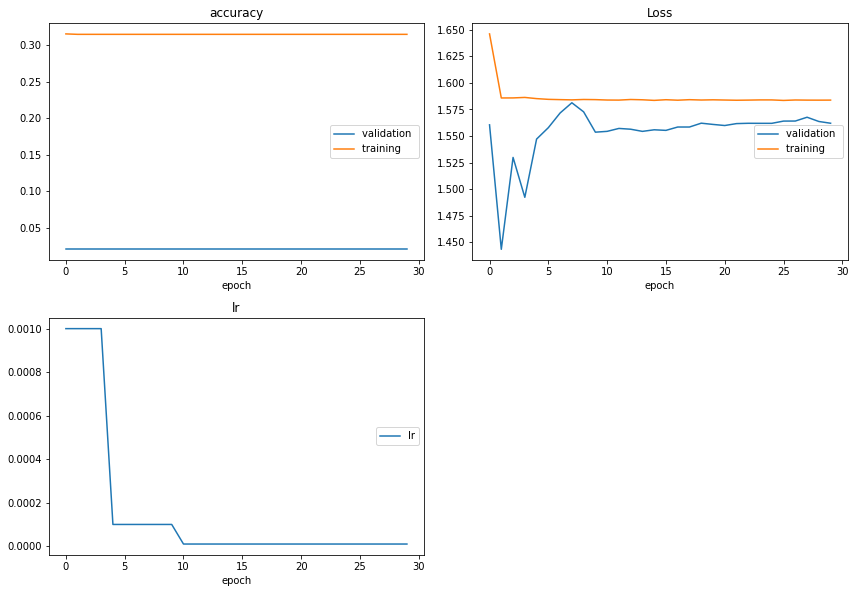

accuracy
	validation       	 (min:    0.021, max:    0.021, cur:    0.021)
	training         	 (min:    0.315, max:    0.315, cur:    0.315)
Loss
	validation       	 (min:    1.443, max:    1.581, cur:    1.562)
	training         	 (min:    1.583, max:    1.646, cur:    1.584)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)

Epoch 00030: val_loss did not improve from 1.44342


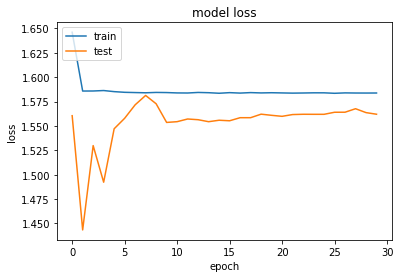

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 30 #10
path="/content/drive/My Drive/covid_runs/attempt6/"

os.makedirs(path, exist_ok=True)
json_model = model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]

history = model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks,
    class_weight={0:3,1:1,2:1}
)


model.save_weights(path + "last_run.hdf5")
model.save(path + "model_state")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [ ]:
model_cloud = load_model_from_cloud(path + "model.json", path + "last_run.hdf5")
model_cloud.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)       

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [ ]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [ ]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.02      1.00      0.04        31
      Normal       0.00      0.00      0.00       885
   Pneumonia       0.00      0.00      0.00       594

    accuracy                           0.02      1510
   macro avg       0.01      0.33      0.01      1510
weighted avg       0.00      0.02      0.00      1510



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Ground truth')

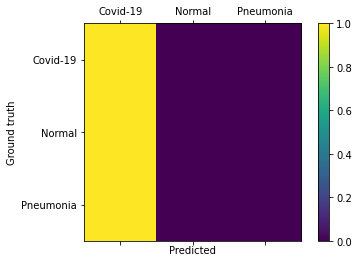

In [ ]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

## Continuing Training CXRP-3B

In [ ]:
model = load_model_from_cloud("/content/drive/My Drive/covid_runs/attempt4/" + "model.json", "/content/drive/My Drive/covid_runs/attempt4/" + "last_run.hdf5")
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

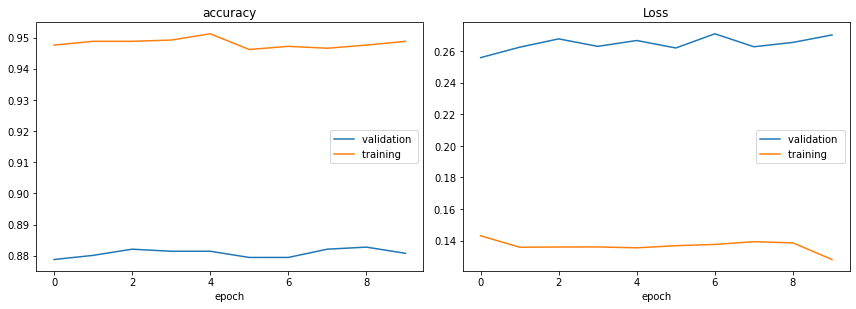

accuracy
	validation       	 (min:    0.879, max:    0.883, cur:    0.881)
	training         	 (min:    0.946, max:    0.951, cur:    0.949)
Loss
	validation       	 (min:    0.256, max:    0.271, cur:    0.270)
	training         	 (min:    0.128, max:    0.143, cur:    0.128)

Epoch 00010: val_loss did not improve from 0.25595


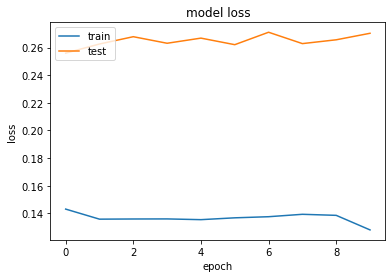

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 10 #10
path="/content/drive/My Drive/covid_runs/attempt7/"

os.makedirs(path, exist_ok=True)
json_model = model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)


plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [plotlosses, checkpoint]

history = model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks,
    class_weight={0:3,1:1,2:1}
)


model.save_weights(path + "last_run.hdf5")
model.save(path + "model_state")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [ ]:
model_cloud = load_model_from_cloud(path + "model.json", path + "last_run.hdf5")
model_cloud.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 56, 56, 64)       

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [ ]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [ ]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.47      0.90      0.62        31
      Normal       0.91      0.91      0.91       885
   Pneumonia       0.88      0.84      0.86       594

    accuracy                           0.88      1510
   macro avg       0.75      0.88      0.80      1510
weighted avg       0.89      0.88      0.88      1510



Text(0, 0.5, 'Ground truth')

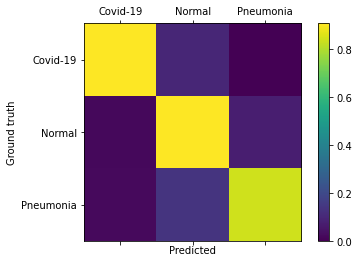

In [ ]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

## Training CXRP-3B_V4 with Balanced DataSet

In [ ]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(2,2),activation='relu', padding='same'))
model.add(Conv2D(64,(2,2),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(2,2),activation='relu', padding='same'))
model.add(Conv2D(64,(2,2),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(2,2),activation='relu', padding='same'))
model.add(Conv2D(64,(2,2),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(3,activation='softmax'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 128)     3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      32832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)       

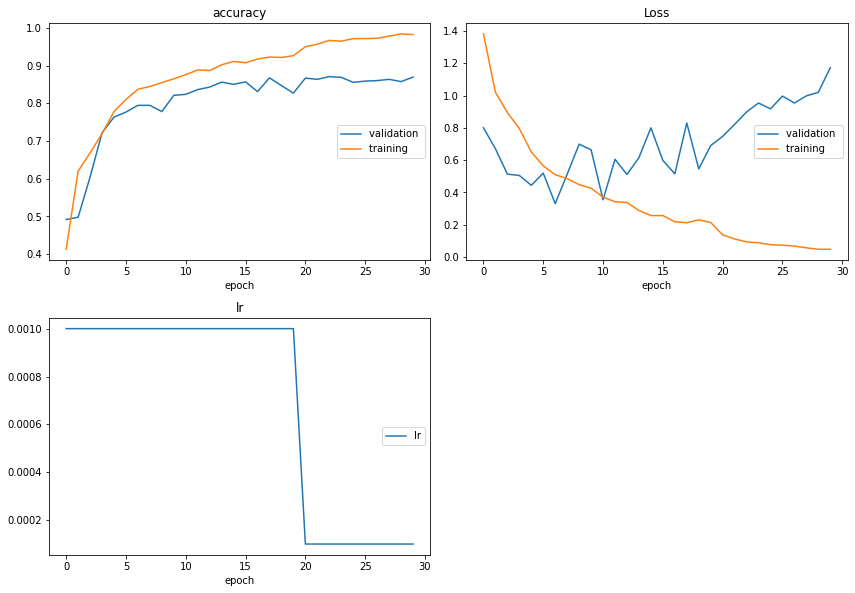

accuracy
	validation       	 (min:    0.492, max:    0.871, cur:    0.870)
	training         	 (min:    0.413, max:    0.984, cur:    0.982)
Loss
	validation       	 (min:    0.331, max:    1.173, cur:    1.173)
	training         	 (min:    0.048, max:    1.382, cur:    0.048)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)

Epoch 00030: val_loss did not improve from 0.33128


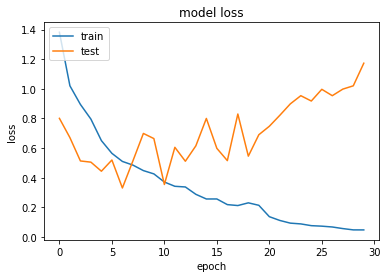

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 30 #10
path="/content/drive/My Drive/covid_runs/attempt8/"

os.makedirs(path, exist_ok=True)
json_model = model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]

history = model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks,
    class_weight={0:3,1:1,2:1}
)


model.save_weights(path + "last_run.hdf5")
model.save(path + "model_state")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [ ]:
model_cloud = load_model_from_cloud(path + "model.json", path + "last_run.hdf5")
model_cloud.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 128)     3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      32832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)       

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [ ]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [ ]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.43      0.81      0.56        31
      Normal       0.92      0.89      0.90       885
   Pneumonia       0.85      0.85      0.85       594

    accuracy                           0.87      1510
   macro avg       0.73      0.85      0.77      1510
weighted avg       0.88      0.87      0.87      1510



Text(0, 0.5, 'Ground truth')

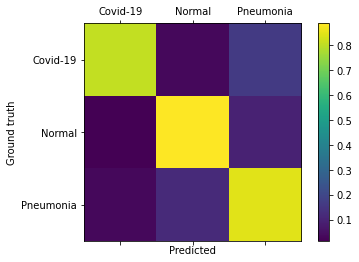

In [ ]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

## Training CXRP-3B_V5 with Balanced DataSet

In [ ]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(224,224,3),activation='relu', padding='same'))
model.add(Conv2D(128,(4,4),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(3,activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)       

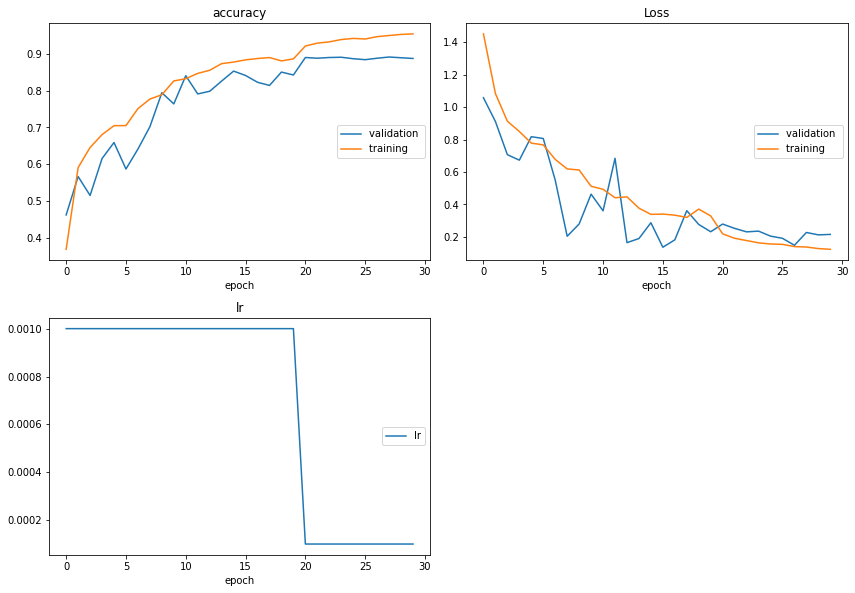

accuracy
	validation       	 (min:    0.462, max:    0.892, cur:    0.888)
	training         	 (min:    0.368, max:    0.955, cur:    0.955)
Loss
	validation       	 (min:    0.136, max:    1.057, cur:    0.215)
	training         	 (min:    0.124, max:    1.451, cur:    0.124)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)

Epoch 00030: val_loss did not improve from 0.13632


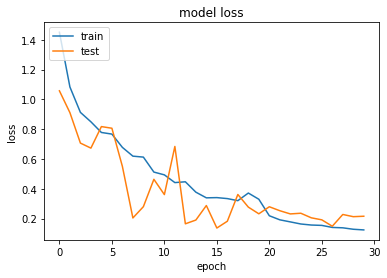

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 30 #10
path="/content/drive/My Drive/covid_runs/attempt9/"

os.makedirs(path, exist_ok=True)
json_model = model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]

history = model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks,
    class_weight={0:3,1:1,2:1}
)


model.save_weights(path + "last_run.hdf5")
model.save(path + "model_state")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [ ]:
model_cloud = load_model_from_cloud(path + "model.json", path + "last_run.hdf5")
model_cloud.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)       

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [ ]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [ ]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.49      0.84      0.62        31
      Normal       0.93      0.90      0.91       885
   Pneumonia       0.86      0.88      0.87       594

    accuracy                           0.89      1510
   macro avg       0.76      0.87      0.80      1510
weighted avg       0.90      0.89      0.89      1510



Text(0, 0.5, 'Ground truth')

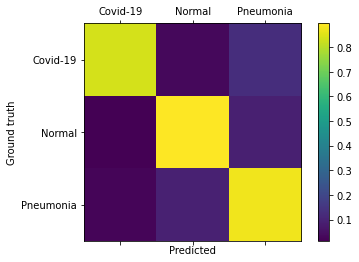

In [ ]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

In [ ]:
model = load_model_from_cloud("/content/drive/My Drive/covid_runs/attempt9/" + "model.json", "/content/drive/My Drive/covid_runs/attempt9/" + "last_run.hdf5")
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

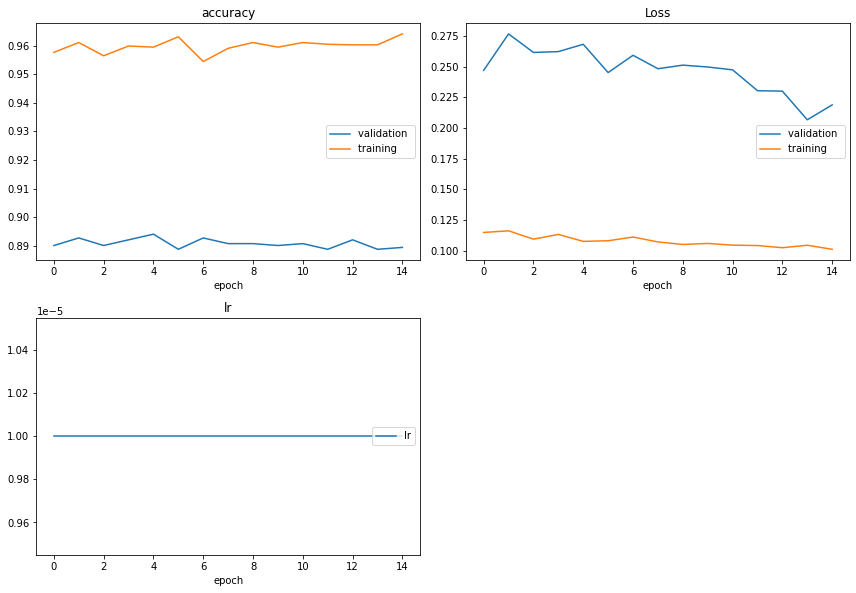

accuracy
	validation       	 (min:    0.889, max:    0.894, cur:    0.889)
	training         	 (min:    0.954, max:    0.964, cur:    0.964)
Loss
	validation       	 (min:    0.207, max:    0.277, cur:    0.219)
	training         	 (min:    0.101, max:    0.116, cur:    0.101)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)

Epoch 00015: val_loss did not improve from 0.20662


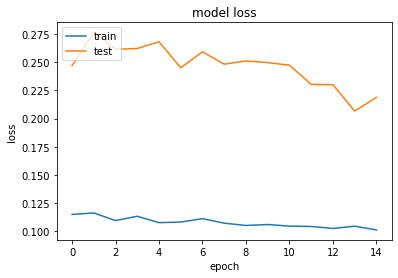

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras
import os

no_of_epochs  = 15 #10
path="/content/drive/My Drive/covid_runs/attempt9_extended/"

os.makedirs(path, exist_ok=True)
json_model = model.to_json()
with open(path+"model.json", "w") as json_file:
  json_file.write(json_model)

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
plotlosses = PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint(filepath=path+'best_weights.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

callbacks = [reduce_learning_rate, plotlosses, checkpoint]

history = model.fit_generator(
    train_set_balanced,
    epochs = no_of_epochs,
    validation_data=test_set_balanced,
    callbacks=callbacks,
    class_weight={0:3,1:1,2:1}
)


model.save_weights(path + "last_run.hdf5")
model.save(path + "model_state")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "accuracy.png")
# summarize history for loss
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path + "loss.png")

In [ ]:
model_cloud = load_model_from_cloud(path + "model.json", path + "last_run.hdf5")
model_cloud.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 128)     6272      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 128)     262272    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 64)      73792     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)       

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_set = predict_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='image',
    directory="test/",
    y_col='result',
    shuffle=False,
    target_size=(image_width, image_height),
    batch_size = 1,
    class_mode='categorical'
)

filenames = predict_set.filenames
nb_samples = len(filenames)

Found 1510 validated image filenames belonging to 3 classes.


In [ ]:
predict = model_cloud.predict_generator(predict_set,steps = nb_samples)

In [ ]:
res = []
for i in predict:
  if i[0] > 0.5:
    res.append(0)
  elif i[1] > 0.5:
    res.append(1)
  else:
    res.append(2)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(predict_set.classes, res, normalize='true')
cr = classification_report(predict_set.classes, res, target_names=['Covid-19','Normal', 'Pneumonia'])
#print(cm)
print(cr)

              precision    recall  f1-score   support

    Covid-19       0.52      0.81      0.63        31
      Normal       0.93      0.90      0.91       885
   Pneumonia       0.86      0.88      0.87       594

    accuracy                           0.89      1510
   macro avg       0.77      0.86      0.81      1510
weighted avg       0.90      0.89      0.89      1510



Text(0, 0.5, 'Ground truth')

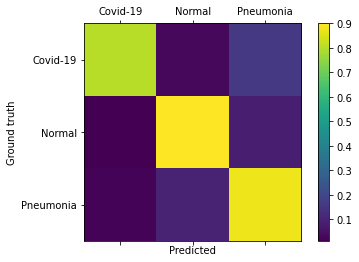

In [ ]:
labels = ['Covid-19','Normal', 'Pneumonia']
fig, ax = plt.subplots()
h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')